# CS677 Machine Learning Assignment #2

Aayushi Verma

## Question One
Explain the example code step by step for the given reference links. For each Python notebook, you must write an explanation of about 100 words.

### 1.1 Linear Regression
https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#linear-regression-example

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


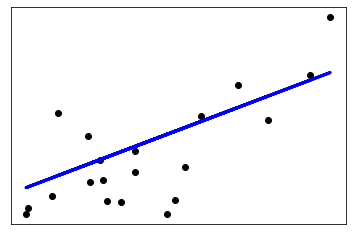

In [1]:
# Code source: Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()

This code is an example walkthrough of using scikit-learn's linear\_model package to perform a linear regression. The code starts by importing matplotlib for plotting, numpy for numerical analysis, sklearn datasets for using a sample Diabetes dataset, sklearn linear\_model for creating the linear model, and sklearn.metrics's mean\_squared\_error and r2\_score to evauluate the performance of the model.

The next line of the code creates two variables, diabetes\_X and diabetes\_Y, by loading the diabetes data from the datasets module, and splitting it into X and Y, where Y is the target feature.

The next line of code modifies the diabetes\_X variable by selecting only one feature, so that we can perform a univariate linear regression.

The next lines of code create two new variables: diabetes\_X\_train, and diabetes\_X\_test, using the last 20 rows of diabetes\_X as the test data, and everything else as the training data. The next two lines of code do the same for diabetes\_Y.

The next line of code instantiates a linear regression object from the linear\_model module.

The next line of code uses the training data (diabetes\_X\_train, diabetes\_Y\_train) to train the previously-instantiated model.

The next line of code uses the test data, diabetes\_X\_test, to create predicted labels using the trained model.

The next lines of code print out evaluation metrics for the model, namely the coefficients of the model, the mean squared error of the model, and the coefficient of determination of the model. These last two metrics are determined using both the diabetes\_Y\_test data, and the predicted Y labels.

Finally, the last few lines of code plot the test data points and the line of best fit.

### 1.2 Logistic Regression

https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html##logistic-regression-3-class-classifier

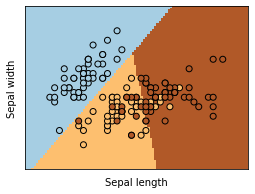

In [2]:
# Code source: Gaël Varoquaux
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.linear_model import LogisticRegression

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

# Create an instance of Logistic Regression Classifier and fit the data.
logreg = LogisticRegression(C=1e5)
logreg.fit(X, Y)

_, ax = plt.subplots(figsize=(4, 3))
DecisionBoundaryDisplay.from_estimator(
    logreg,
    X,
    cmap=plt.cm.Paired,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    shading="auto",
    xlabel="Sepal length",
    ylabel="Sepal width",
    eps=0.5,
)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=Y, edgecolors="k", cmap=plt.cm.Paired)


plt.xticks(())
plt.yticks(())

plt.show()

This code is an example walkthrough of using scikit-learn's linear\_model package to perform a logistic regression. The code starts by importing matplotlib for plotting, sklearn datasets for using the Iris dataset, sklearn.inspection's DecisionBoundaryDisplay module for creating the decision boundary, and sklearn linear\_model for creating the logistic model.

The next line of the code reads in the Iris dataset from the datasets module into a variable, iris, and also creates two variables as a subset of iris, X and Y, where Y is the target feature, and only two features are subsetted to create X, so that we can perform a bivariate logistic regression.

The next line of code instantiates a logistic regression object, and uses the X and Y data to train the previously-instantiated model.

The next lines of code use the DecisionBoundaryDisplay module to create data for a plot using the logistic regression with its decision boundaries that were learned by the model.

Finally, the last few lines of code plot the data points and are color-coded to display how they were classified according to the decision boundary.

### 1.3 Underfitting vs Overfitting

https://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html##logistic-regression-3-class-classifier

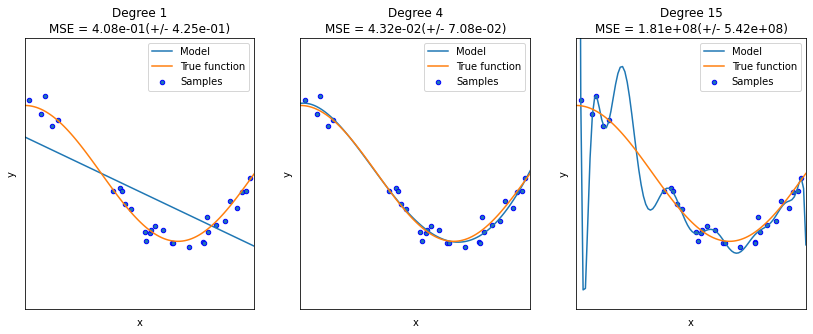

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

This code is an example walkthrough of using linear regression with polynomial features to show underfitting and overfitting of the model on test data.

The code starts by importing matplotlib for plotting, numpy for numerical analysis, sklearn linear\_model for creating the linear model, sklearn model\_selection to import cross\_val\_score, sklearn Pipeline to create a pipeline of steps, and sklearn.preprocessing's PolynomialFeatures.

The next line of code defines a function with an input X to create the true model.

The next lines of code set a random seed, define a variable n\_samples with value 30, and a variable degrees, with values 1, 4, 15 as a list.

The next line of code defines a variable X, which is a sorted list of 30 random numbers, where 30 is the value of the n\_samples variable defined earlier. Another variable, y, is defined, which generates random values based on the function defined earlier (taking X as input), and adding 'randomness' to it using the random function and multiplying by 0.1.

The next block of code iteratively completes a series of actions for each degree of polynomial in the degrees list. It first creates a subplot for each degree, creates an instance of PolynomialFeatures with the current iteration of degree, and instantiantes a LinearRegression object. 

Next, it creates a Pipeline object to apply the polynomial features and the linear regression. The next line fits the training data using the Pipeline object to train the model. 

The next line of code uses 10-fold cross-validation to evaluate the model's performance using the negative mean squared error as the performance metric. 

The next block of code creates a variable X\_test with 100 evenly spaced numbers for plotting on the x-axis, and plots the predictions of the model, the true function, and the training data points. 

For the first iteration, we see that the model does not fit the true function and the training data, showing that it has under-fitted the test data, i.e. the model did not learn the specifics of the model (it is too generalized). The second iteration shows that the model fits the true function and the training data very well, demonstrating that it has learned the rules well enough to apply to test data points. The last iteration does not fit very well either, and has over-fitted to the true function and the training data.

## Question Two
Write a python code to solve simple (Univariate) Linear Regression and predict house prices based on the size of the house using the hypothesis:

$$
h_\Theta (x) = \Theta_0 + \Theta_1 x
$$

Plot best fit line.

First we start by inputting the data elements as a Numpy array, and defining the x and y_true values.

In [4]:
house_prices = np.array(
    [
        [2023,445],
        [1327,304],
        [1115,223],
        [625,166]
    ]
)

In [5]:
x = house_prices[:,0]
y_true = house_prices[:,1]

Now we will plot these points, just to get an idea of what the true data points look like.

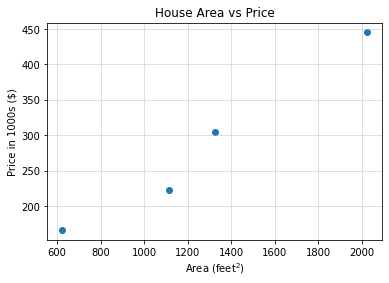

In [6]:
plt.scatter(x, y_true)
plt.xlabel("Area (feet$^2$)")
plt.ylabel("Price in 1000s ($)")
plt.title("House Area vs Price")
plt.grid(alpha=0.5)

We see that as the house size, definied by its area, increases, so does the price. Let's now define some functions to perform our univariate linear regression.

In [7]:
# Defining the hypothesis model in simplified notation
def univariate_lin_reg_model(x, theta):
    return theta.T * x

# Defining the MSE to measure empirical risk loss function
def mean_squared_error(y_true, y_pred):
    m = len(y_true)
    mse = 0
    for index, value in enumerate(y_true):
        mse += (y_pred[index] - y_true[index]) ** 2
    mse /= m
    return mse

# Defining the cost function
def cost_function(y_true, y_pred):
    m = len(y_true)
    j = 0
    for index, value in enumerate(y_true):
        j += (y_pred[index] - y_true[index]) ** 2
    j *= (1 / 2*m)
    return j

Now we will define an array of $\Theta$ values, which will have the same number of values as the x array. Let's guess evenly-spaced values between 0 and 0.5.

In [8]:
theta = np.linspace(0, 0.5, len(x))

We will now iterate over each of the $\Theta$ values and predict corresponding y values. We will use these predicted y values to find the line of best fit for each value of $\Theta$, and overlay them on top of the data points. We will also be calculating the MSE and the cost function $J(\Theta)$.

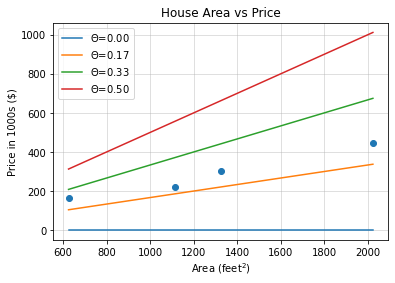

In [9]:
# plotting actual data points
plt.scatter(x, y_true)

# defining empty lists to store values
all_mse = []
all_j_theta = []

# iterating over each theta value
for i in theta:
    # predicting y values for each iteration
    y_pred = univariate_lin_reg_model(x, i)

    # calculating + storing MSE and J_theta values
    all_mse.append(mean_squared_error(y_true, y_pred))
    all_j_theta.append(cost_function(y_true, y_pred))

    # plotting best fit line for each theta
    plt.plot(x, y_pred, label=f'$\Theta$={i:.2f}')
    plt.xlabel("Area (feet$^2$)")
    plt.ylabel("Price in 1000s ($)")
    plt.title("House Area vs Price")

plt.grid(alpha=0.5)
plt.legend()

We see that for each value of our $\Theta$ vector, a line of best fit was evaluated and fitted using univariate linear regression. Now we want to obtain the best value of $\Theta$ that fits our data points the best.

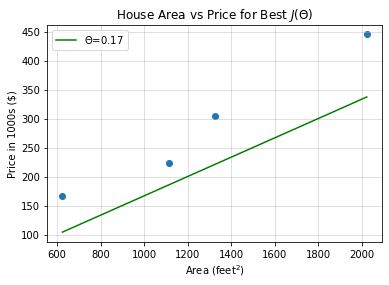

In [10]:
theta_best_mse = theta[np.argmin(all_mse)]
theta_best_j_theta = theta[np.argmin(all_j_theta)]
y_pred_best = univariate_lin_reg_model(x, theta_best_j_theta)

plt.scatter(x, y_true)
plt.plot(x, y_pred_best, 
         color='green', label=f'$\Theta$={theta_best_j_theta:.2f}')
plt.xlabel("Area (feet$^2$)")
plt.ylabel("Price in 1000s ($)")
plt.title("House Area vs Price for Best $J(\Theta)$")
plt.grid(alpha=0.5)
plt.legend()

Just for reference, we also want to plot each value of $\Theta$ against its obtained MSE and $J(\Theta)$.

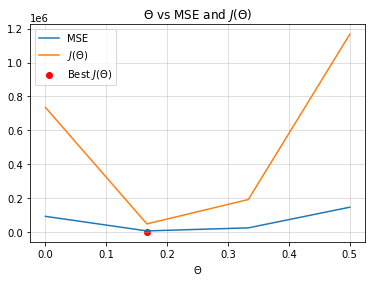

In [11]:
plt.plot(theta, all_mse, label='MSE')
plt.plot(theta, all_j_theta, label='$J(\Theta)$')
plt.scatter(theta[np.argmin(all_j_theta)],theta_best_j_theta, 
            color='red', label='Best $J(\Theta)$')
plt.xlabel('$\Theta$')
plt.title('$\Theta$ vs MSE and $J(\Theta)$')
plt.grid(alpha=0.5)
plt.legend()

Note that the best value of $\Theta$ was found by its corresponding cost $J(\Theta)$, which is the minimum of all $J(\Theta)$ values. The minimum $J(\Theta)$ cost means that its corresponding $\Theta$ value is the most accurate (compared to the other $\Theta$ values) fit to the data points. This is not to say that it's the most optimal cost, however, and there are further optimization techniques, like gradient descent, that we can use to optimize it.

## Question Three
Write a python code to calculate loss function using empirical risk function (Mean Squared Error):

$$
L_S (h) = \frac{\Sigma^m_{i=1} (h(x^i)-y^i)^2}{m}
$$

First, we start by inputting the provided data points as a Numpy array, and defining the y_true and y_pred values.

In [12]:
data = np.array(
    [
        [19,20],
        [26,29],
        [30,26],
        [45,38]
    ]
)

In [13]:
y_true = data[:,0]
y_pred = data[:,1]

Now we will plot these points to get an idea of what the data points look like.

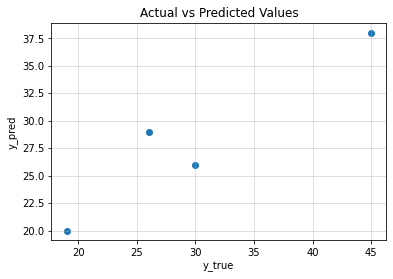

In [14]:
plt.scatter(y_true, y_pred)
plt.xlabel("y_true")
plt.ylabel("y_pred")
plt.title("Actual vs Predicted Values")
plt.grid(alpha=0.5)

We will use the same MSE and $J(\Theta)$ functions defined in Question 2 to calculate the MSE and cost $J(\Theta)$ for these predicted y values.

In [15]:
# Defining the MSE to measure empirical risk loss function
def mean_squared_error(y_true, y_pred):
    m = len(y_true)
    mse = 0
    for index, value in enumerate(y_true):
        mse += (y_pred[index] - y_true[index]) ** 2
    mse /= m
    return mse

# Defining the cost function
def cost_function(y_true, y_pred):
    m = len(y_true)
    j = 0
    for index, value in enumerate(y_true):
        j += (y_pred[index] - y_true[index]) ** 2
    j *= (1 / 2*m)
    return j

Finally, we calcalate the MSE and cost $J(\Theta)$ as:

In [16]:
mse = mean_squared_error(y_true, y_pred)
print(f'The mean squared error (MSE) for these predicted values is {mse}.')

The mean squared error (MSE) for these predicted values is 18.75.


In [17]:
j_theta = cost_function(y_true, y_pred)
print(f'The cost function $J(\Theta)$ for these predicted values is {j_theta}.')

The cost function $J(\Theta)$ for these predicted values is 150.0.
